# Machine Learning Engineer Nanodegree
## Capstone Project -  Predicting arrival delays for flights in the US.

Airline travel is increasingly becoming a primary way of travel for people over medium and long distances. The increased air travel and congested plane slots at the airport result in sometimes significant delays. This is particularly true during the high travel season, not to mention weather related delays. Is it possible to discern a pattern in airline arrival delays and build a model that can learn and predict delays based on historical data?
	In this project we attempt to forecast and attribute flight delays in the domestic US market. In general, flights may be delayed for various reasons. Flights may get diverted or canceled due adverse weather, may get delayed due to aircraft maintenance issues, or labor unrest or just plain congestion in the air or at the airports. In many instances planes may depart from their origin later than the publicized departure time but airlines usually build in a guard band in the schedule and a late departure may not pre-ordain a late arrival. Also delayed departures can be made up during the actual flight time by flying the aircraft faster (burning more fuel etc.) There are many parts in this puzzle and we will try to pinpoint the main factors that can explain the later arrivals. We will then build a model to train and see if it can accurately predict on a held out set. This is the Machine Learning part. Arguably some airlines are better at managing delays than others and we will take a look at the data to see which airlines manage delays better and which routes in particular are delay prone. This is the Data Analysis part. 
    
>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## SECTION 1 
### Section 1.1 - Getting Started
In this project, we will evaluate the performance and predictive power of various models that have been trained and tested on data collected by the Bureau of Transportation Statistics (BTS.) A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a flight delays.


All the data that we have taken can be found at the following web address [Government website](http://transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time). The guide for each of the fields is as below.

| Field            | Description |
| :---------------: | :---------------------: |
|`FlightDate`	      | Flight Date (yyyymmdd)	|
|`UniqueCarrier`	  | Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.|
|`FlightNum`          | Flight Number	|	 
|`OriginAirportID`	  | Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.|
|`OriginCityMarketID` |	Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.|
|`OriginCityName`	  | Origin Airport, City Name |		 
|`DestAirportID`      |	Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.|
|`DestCityMarketID`   |	Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.|	
|`DestCityName`       |	Destination Airport, City Name |	 
|`DepTime`            |	Actual Departure Time (local time: hhmm) |		 
|`DepDelay`           |	Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.|
|`ArrTime`            |	Actual Arrival Time (local time: hhmm)		 
|`ArrDelay`           |	Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.|
|`AirTime`            |	Flight Time, in Minutes		| 
|`Flights`            |	Number of Flights		| 
|`Distance`           |	Distance between airports (miles)		| 
|`CarrierDelay`       |	Carrier Delay, in Minutes	|	 
|`WeatherDelay`       |	Weather Delay, in Minutes	|	 
|`NASDelay`           |	National Air System Delay, in Minutes	|	 
|`SecurityDelay`  	  | Security Delay, in Minutes	|	 
|`LateAircraftDelay`  |	Late Aircraft Delay, in Minutes|

A quick check on the dates of the data shows that these data are for the month of January/2016. We will analyze the data in more details later to make sure it is not dominated by outliers or disproportionately scaled features.


In [64]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import random
from IPython.display import display
from time import time
from sklearn.metrics import f1_score
import re
import json
import urllib2
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Flight Data
data = pd.read_csv('flight.csv')

# Set pandas option to display all the columns
pd.set_option('display.max_columns', None)

# Display the first few lines of the data
display ("This is the flight data that we read in (un) pre-processed")
display(data.head())
print "-"*100
# What are the data types for the data.
display (" This is the information about the data types in our flight data that we read in (un) pre-processed")
display(data.dtypes)
print "-"*100

# Success
print "Flight Delay dataset has {} data points with {} variables each.".format(*data.shape)


'This is the flight data that we read in (un) pre-processed'

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 21
0,2016-01-01,AA,43,11433,31295,"Detroit, MI",11298,30194,"Dallas/Fort Worth, TX",1539.0,26.0,1756.0,32.0,149.0,1.0,986.0,26.0,0.0,6.0,0.0,0.0,NaN
1,2016-01-01,AA,44,14747,30559,"Seattle, WA",12478,31703,"New York, NY",741.0,-4.0,1610.0,8.0,294.0,1.0,2422.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,AA,45,12478,31703,"New York, NY",14747,30559,"Seattle, WA",1819.0,-6.0,2125.0,-25.0,324.0,1.0,2422.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,AA,46,14831,32457,"San Jose, CA",13930,30977,"Chicago, IL",1423.0,-2.0,2029.0,-14.0,220.0,1.0,1829.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,AA,47,13930,30977,"Chicago, IL",14831,32457,"San Jose, CA",1746.0,-4.0,2007.0,-27.0,245.0,1.0,1829.0,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------


' This is the information about the data types in our flight data that we read in (un) pre-processed'

FL_DATE                   object
UNIQUE_CARRIER            object
FL_NUM                     int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN_CITY_NAME          object
DEST_AIRPORT_ID            int64
DEST_CITY_MARKET_ID        int64
DEST_CITY_NAME            object
DEP_TIME                 float64
DEP_DELAY                float64
ARR_TIME                 float64
ARR_DELAY                float64
AIR_TIME                 float64
FLIGHTS                  float64
DISTANCE                 float64
CARRIER_DELAY            float64
WEATHER_DELAY            float64
NAS_DELAY                float64
SECURITY_DELAY           float64
LATE_AIRCRAFT_DELAY      float64
Unnamed: 21              float64
dtype: object

----------------------------------------------------------------------------------------------------
Flight Delay dataset has 445827 data points with 22 variables each.


## Section 2 - Data Exploration
In this first section of this project, we make a cursory investigation about the Flight delay data and provide our observations. We will need to separate the dataset into **features** and the **target variable**.  The **target variable**, `'ARR_DELAY'`, will be the variable we seek to predict.  All the columns other than the target variable end up as the  **features**. Some of the features give us quantitative information and some give us qualitative information about each data point. These are stored in `features_set`.


### Section 2.1 - Implementation: Calculate Statistics
Now we calculate descriptive statistics about the flight delays. We use `numpy` that has already been imported to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.


In [85]:
#### Data show a spurious column at the end that gets downloaded with the data. Remove it.
data = data.iloc[:,0:data.shape[1]-1]

# Show the calculated statistics
print "Statistics for Flight Delay dataset:\n"

print "-"*100


## We pull out the  ARR/DEP times and delays for display
delays = data.loc[:,['ARR_DELAY', 'DEP_DELAY', 'DISTANCE', 'AIR_TIME']].dropna(how='any')
times = data.loc[:,['ARR_TIME', 'DEP_TIME']].dropna(how='any')

display ("Descriptive Statistics for Arr/Dep delays")
display(delays.describe())
print "-"*100
display ("Descriptive Statistics for Arr/Dep times")
display(times.describe())
print "-"*100


## save indices for PCA later
samples = []

# Finally we print out the shortest/longest flights by distance and in air time.
temp_data = data[0:][data.DISTANCE == max(data.DISTANCE)]
index = np.random.choice(range(0, temp_data.shape[0]))
samples.append(temp_data[index:index+1].index[0])
display ("Display the Longest distance flight in our Database")
display(temp_data[index:index+1])
print "-"*100
temp_data = data[0:][data.DISTANCE == min(data.DISTANCE)]
index = np.random.choice(range(0, temp_data.shape[0]))
samples.append(temp_data[index:index+1].index[0])
display ("Display the Shortest distance flight in our Database")
display(temp_data[index:index+1])
print "-"*100
temp_data = data[0:][data.AIR_TIME == max(data.AIR_TIME)]
index = np.random.choice(range(0, temp_data.shape[0]))
samples.append(temp_data[index:index+1].index[0])
display ("Display the Longest flying time flight in our Database")
display(temp_data[index:index+1])
print "-"*100
temp_data = data[0:][data.AIR_TIME == min(data.AIR_TIME)]
index = np.random.choice(range(0, temp_data.shape[0]))
samples.append(temp_data[index:index+1].index[0])
display ("Display the Shortest flying time flight in our Database")
display(temp_data[index:index+1])


print "Using Sample indices for PCA"
print samples

print "\n\n\n"
print "These flights can be cross checked with the longest flights from this website: http://weekendblitz.com/top-7-longest-domestic-us-flights"

Statistics for Flight Delay dataset:

----------------------------------------------------------------------------------------------------


'Descriptive Statistics for Arr/Dep delays'

,ARR_DELAY,DEP_DELAY,DISTANCE,AIR_TIME
count,433298.000000,433298.000000,433298.000000,433298.000000
mean,1.533654,7.755997,843.752214,116.395818
std,39.096842,36.730931,609.423956,72.981191
min,-79.000000,-47.000000,31.000000,8.000000
25%,-15.000000,-5.000000,391.000000,62.000000
50%,-7.000000,-2.000000,679.000000,98.000000
75%,5.000000,5.000000,1089.000000,148.000000
max,1659.000000,1663.000000,4983.000000,698.000000


----------------------------------------------------------------------------------------------------


'Descriptive Statistics for Arr/Dep times'

,ARR_TIME,DEP_TIME
count,433920.000000,433920.000000
mean,1488.101445,1334.164440
std,518.681533,492.906327
min,1.000000,1.000000
25%,1108.000000,924.000000
50%,1522.000000,1331.000000
75%,1919.000000,1736.000000
max,2400.000000,2400.000000


----------------------------------------------------------------------------------------------------


'Display the Longest distance flight in our Database'

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
428841,30,6,51,12478,31703,"New York, NY",12173,32134,"Honolulu, HI",954.0,-6.0,1641.0,16.0,681.0,1.0,4983.0,16.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


'Display the Shortest distance flight in our Database'

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
347805,25,1,64,14256,34256,"Petersburg, AK",15841,35841,"Wrangell, AK",1500.0,-20.0,1538.0,-6.0,15.0,1.0,31.0,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------


'Display the Longest flying time flight in our Database'

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
169490,12,6,51,12478,31703,"New York, NY",12173,32134,"Honolulu, HI",955.0,-5.0,1655.0,30.0,698.0,1.0,4983.0,30.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


'Display the Shortest flying time flight in our Database'

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
276715,20,1,65,15841,35841,"Wrangell, AK",14256,34256,"Petersburg, AK",1046.0,-20.0,1108.0,-22.0,8.0,1.0,31.0,NaN,NaN,NaN,NaN


Using Sample indices for PCA
[428841, 347805, 169490, 276715]




These flights can be cross checked with the longest flights from this website: http://weekendblitz.com/top-7-longest-domestic-us-flights


### Section 2.2 - Data Analysis
Next we turn our attention to some quick data analysis. The data we have gathered is rich and lets see if we can try to glean some insights from it. Out of curiosity we will answer the following questions:

1) For the largest arrival delays which were related to weather and what was the weather like at these airports/cities on the day of flight.

2) Which airport experienced these large weather related delays

3) Finally we will plot out the airports which had the most flights for the month of January.

4) What airlines had the most number of flights in this month? What % of these flights were delayed by more than 200 minutes?

5) Which city pairs experienced the most delayed flights beyond 200 minutes?

Note that our data does not have any weather related information for the days of the flights (much less for the days of the significant flight delays). In order to correlate our flight delay data with the weather we will have to query historical data from http://www.wunderground.com.

Also note that since querying the website is very expensive we try to limit the data we query and hence we restrict it to only flights that were delayed more than 200 minutes and this delay was mostly weather related.

In [66]:
## Function to Query historical weather data for a particular date using the wunderground api. 
## wunderground api returns data in a particular format that needs to be massaged to add to our Pandas DF.
## The query returns a tuple in (Worigin, Wdestination) format.

def qWeather(x, y, z) :
    date = re.sub("-", "", x)
    (city, state) = y.split(",")
    city = city.split("/")[0]
    city = re.sub(" ","_", city)
    state = re.sub("^ ","", state)
    url1 = "http://api.wunderground.com/api/7fffb0009c3f8fb2/history_" + date + "/q/" + state + "/" + city + ".json" 
    (city, state) = z.split(",")
    city = city.split("/")[0]
    city = re.sub(" ","_", city)
    state = re.sub("^ ","", state)
    url2 = "http://api.wunderground.com/api/7fffb0009c3f8fb2/history_" + date + "/q/" + state + "/" + city + ".json" 
    #print url1
    #print url2
    response1 = json.load(urllib2.urlopen(url1))
    response2 = json.load(urllib2.urlopen(url2))
    try:
        return response1['history']['observations'][0]['conds'], response2['history']['observations'][0]['conds']
    except:
        return "NAN"
    
# Function to sort tuple.
def sortTuple(x):
    if x[0] > x[1]:
        return x[1], x[0]
    else:
        return x[0], x[1]
    

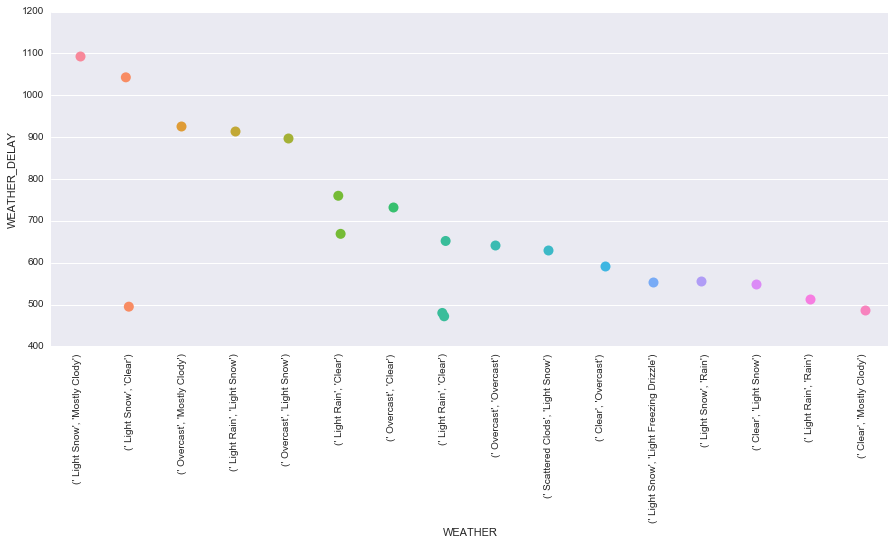

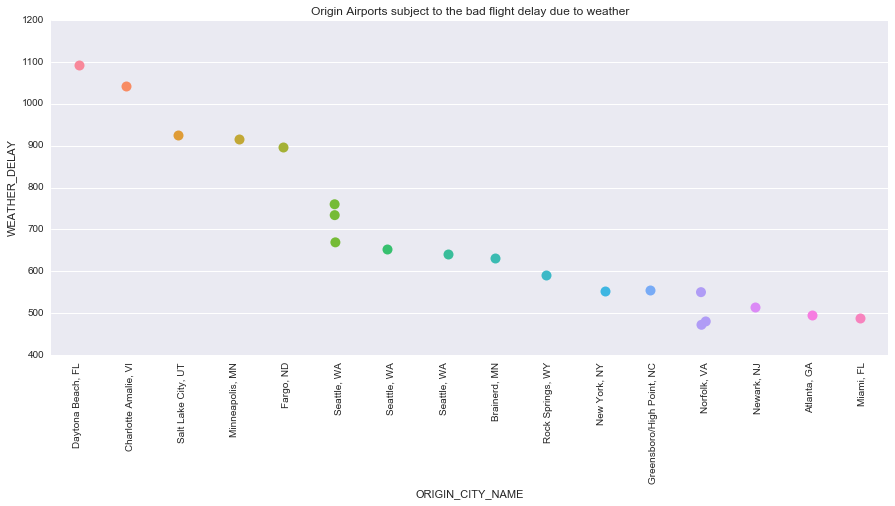

In [67]:

## This controls if you want to run thr api to query the data fro mthe website directly. Since this is costly 
## we have queroed the data once and saved it in a file called "weather_delay.csv"
## Change this to True if you want to query the website through the api.
callApi = False

if callApi:
    ## Find all flights with arrival delay more than 200.
    weather_gt_200 = data.loc[data.ARR_DELAY > 200]
    ## And most of this delay was weather related according to the BTS data.
    weather_gt_200 = weather_gt_200.loc[(weather_gt_200.ARR_DELAY  - weather_gt_200.WEATHER_DELAY) <= 30, ['FL_DATE', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
    ## There are mutiple flights in day from the same airport. We need to find
    ## the weather only once. Drop the duplicates
    weather_gt_200 = weather_gt_200.drop_duplicates(['FL_DATE', 'ORIGIN_CITY_NAME'])
    ## Weather in cities with flight delays > 200 mins and most of it weather related. 
    ## The web query is 
    weather_gt_200['WEATHER'] = pd.Series(weather_gt_200.apply(lambda row : qWeather(row['FL_DATE'], row['ORIGIN_CITY_NAME'], row['DEST_CITY_NAME']), axis = 1), index=weather_gt_200.index)
    print "Overwriting weather_delay.csv with latest data"
    # Save it to a CSV file for the next run
    weather_gt_200.to_csv(path_or_buf="weather_delay.csv")
else:
    weather_gt_200 = pd.read_csv('weather_delay.csv')

## Massage the data so that is is easy to plot. Flight delays can occur becuase of bad weather in 
## origin city or destination city. So we can treat (Worigin, Wdestination) and (Wdestination, Worigin) as the same.
weather_gt_200 = weather_gt_200.sort_values(by='ARR_DELAY', ascending=False)
weather_gt_200['WEATHER'] = weather_gt_200['WEATHER'].map(lambda x: str(x)).map(lambda x: x.replace("u", "")).map(lambda x: x.replace("(", "")).map(lambda x: x.replace(")", "")).map(lambda x: x.replace("'", "")).map(lambda x: x.split(","))
weather_gt_200.loc[:,'WEATHER'] = weather_gt_200['WEATHER'].map(lambda x: sortTuple(x))\

## Plot the data. Have to set the figure size before we plot it. Note we only plot the top 20 delays to keep the
## plot readable
f, (ax1) = plt.subplots(1,figsize=(15,6))
f, (ax2) = plt.subplots(1,figsize=(15,6))

plt.title("Weather condition causing the delays")
w_plot1 = sns.stripplot(y='WEATHER_DELAY', x='WEATHER', data=weather_gt_200[0:20], jitter=True, size=10, ax=ax1)
_ = ax1.set_xticklabels(weather_gt_200['WEATHER'], rotation=90)
plt.title("Origin Airports subject to the bad flight delay due to weather")
w_plot2 = sns.stripplot(y='WEATHER_DELAY', x='ORIGIN_CITY_NAME', data=weather_gt_200[0:20], jitter=True, size=10, ax=ax2)
_ = ax2.set_xticklabels(weather_gt_200['ORIGIN_CITY_NAME'], rotation=90)

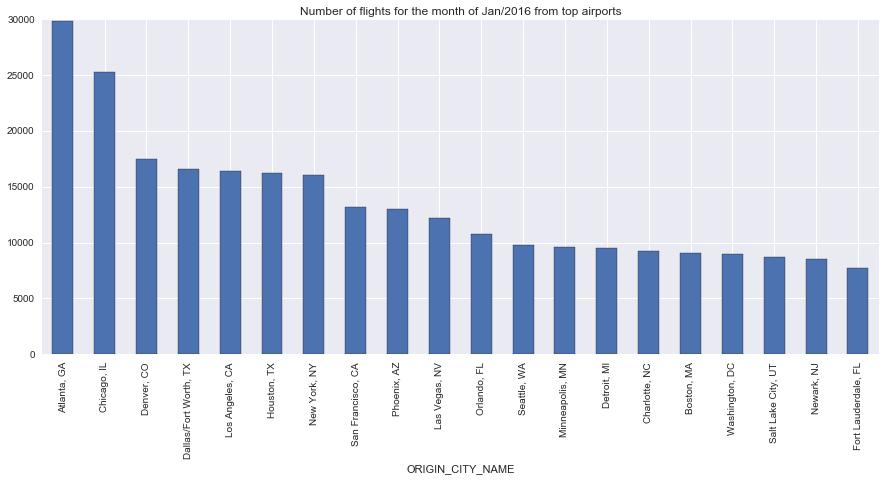

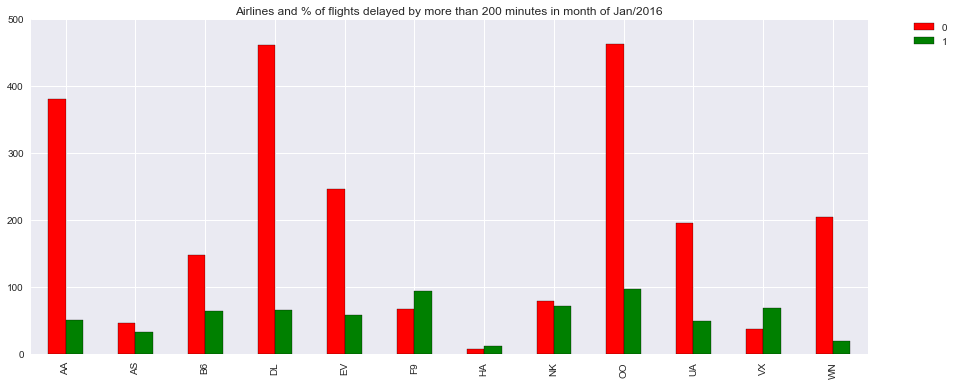

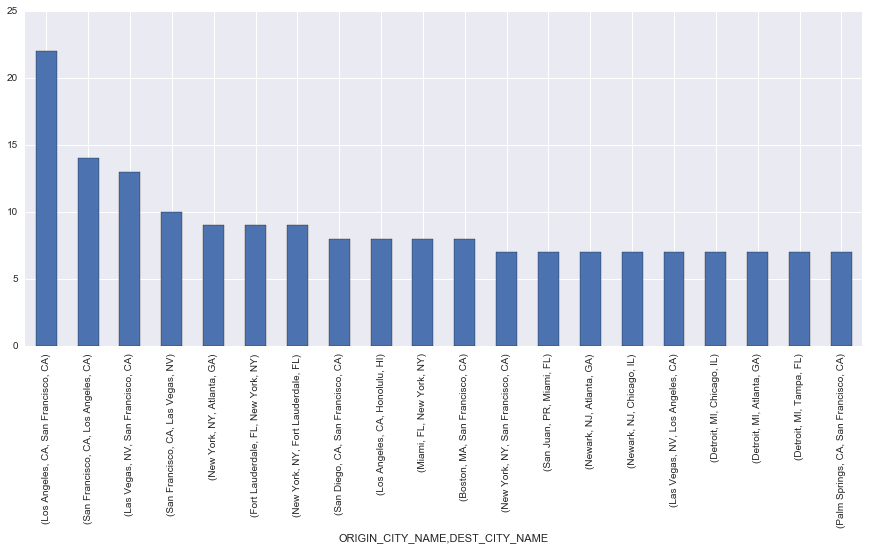

In [68]:
## Airports handling flights more than 500    
arpt_gt_500 = data.groupby('ORIGIN_CITY_NAME').size().sort_values(ascending=False)
arpt_gt_500[arpt_gt_500 > 500]
f, (ax3) = plt.subplots(1,figsize=(15,6))
plt.title("Number of flights for the month of Jan/2016 from top airports")
_ = arpt_gt_500[0:20].plot(kind='bar', ax=ax3)

# Airlines delayed by more than 200 minutes
arln_gt_200 = data.loc[data.ARR_DELAY > 200, ['UNIQUE_CARRIER', 'FL_NUM', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME']]
f, (ax4) = plt.subplots(1,figsize=(15,6))
plt.title("Airlines and % of flights delayed by more than 200 minutes in month of Jan/2016")
arln_gt_200_plot = arln_gt_200.groupby(['UNIQUE_CARRIER']).size().sort_values(ascending=False)
arln_gt_0_plot = data.groupby(['UNIQUE_CARRIER']).size().sort_values(ascending=False)
pct_gt_200_plot = ((arln_gt_200_plot/arln_gt_0_plot)*10000).sort_values(ascending=False)
#arln_gt_200_plot.plot(kind='bar', ax=ax4, label = "Number of flights delayed more than 200", color = 'red')
#pct_gt_200_plot.plot(kind='bar', ax=ax4, label = "%of all flights delayed more than 200", color = 'green')
pd.concat([arln_gt_200_plot, pct_gt_200_plot], axis = 1).plot(kind= 'bar', ax=ax4, color = ['red', 'green'], label = ["Number of flights delayed more than 200", "%of all flights delayed more than 200"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Origin, destination airports with delays
src_dest_arpt_gt_200 = arln_gt_200.groupby(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME']).size().sort_values(ascending=False)
f, (ax5) = plt.subplots(1,figsize=(15,6))
(src_dest_arpt_gt_200[0:20]).plot(kind= 'bar', ax=ax5)

----

## Section 3 - Developing a Model (REGRESSION)
In this and subesquent sections of the project, we develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in the predictions. Since we are trying to predict the arrival delay (which is a continous variable) it is natural to favor a regression as our first choice for model.

### Section 3.1 - Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we calculate the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, we implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [69]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Section 3.2 - Goodness of Fit - An idea
Looking at the various features that make up the feature list from section 1.1 we can make a very educated guess which features may have an outsized effect on the arrival delays. Delays may be predominant for flights of certain distance/flight time or they may be predominant at particular departure/arrival airports or they may be more prevalent for flights at certain time of the day (e.g night flights.) All of these are valid guesses and we will use of these features in out lerning model. But the greatest predictor for a flight that arrives late is a flight that departs late. Are we correct in our thinking or do the airlines build in enough schedule guardband or have operational flexibility to absorb dpearture delays without causing arrival delays. A quick check would be to find the correlation coefficient (or  more accurately the R<sup>2</sup>) between the arival and departure delays to see how closely they are related. This is shown in the cell below.

In [70]:
# Calculate the performance of this model
score = performance_metric(delays.iloc[:,0:1], delays.iloc[:,1:2])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)
score = performance_metric(delays.iloc[:,0:1], delays.iloc[:,2:3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)
score = performance_metric(delays.iloc[:,0:1], delays.iloc[:,3:4])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.859.
Model has a coefficient of determination, R^2, of -707.918.
Model has a coefficient of determination, R^2, of -12.182.


This is a fairly high R^2. This implies a strong linear correlation between arrival delay and departure delay. The airlines operating do not build enough schedule guardband or have any operational flexibility to absorb dpearture delays without causing arrival delays. **Thus a flight that leaves late will most likely arrive late.**

In the meantime we see that other than `DEP_DELAY` there are no other variables that exhibit strong **linear** correlation with `ARR_DELAY`. Thus linear regression between the feature set and the predicted will be dominated by `DEP_DELAY`. This means that we cannot use linear classifiers for this problem and we turn to non-linear DecisionTreeRegressor.

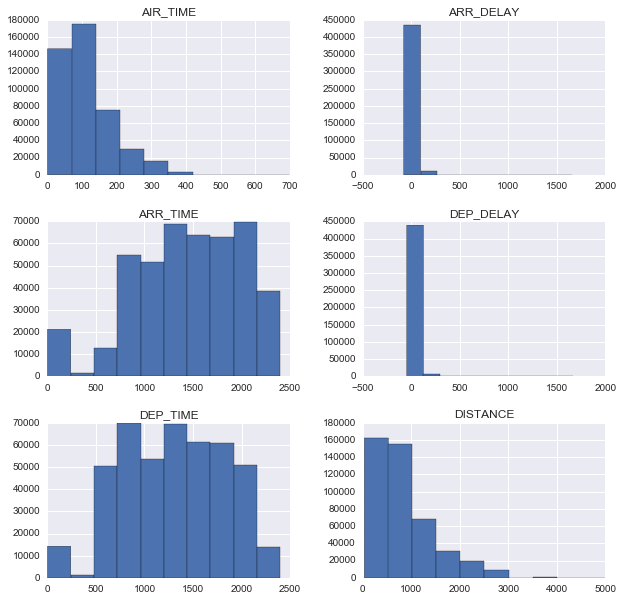

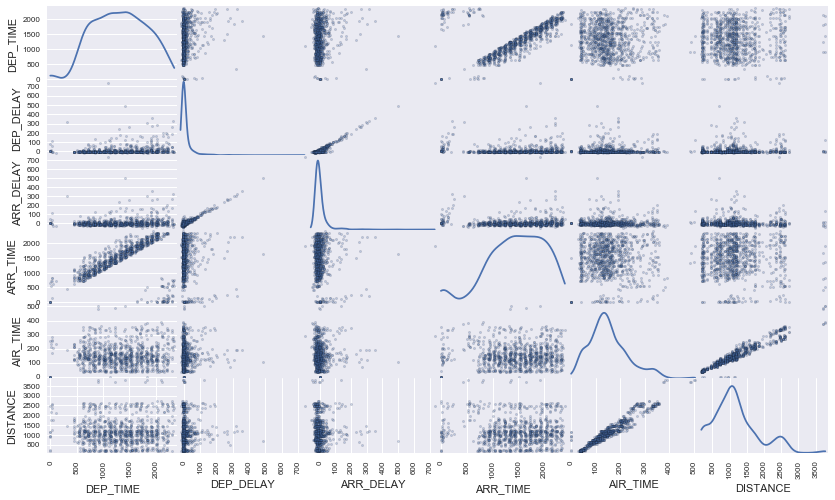

In [71]:
# Import the relevant library
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


### DATA MANIPULATION FOR ANALYSIS

## In order to resue the model for future dates we remove the year and the month and make the date int.
## this will reduce our dependence on dummy variables in Tree classifiers/regressors.
data['FL_DATE'] = data['FL_DATE'].map(lambda x: re.sub(r"^2016-01-",  "", x)).map(lambda x: int(x))

## Map airline names from a categorical to a numerical.
## Ideally since flight numbers are shared by airline we should map airline+fl_num to a unique number
## like this: data['FLIGHT'] = data['UNIQUE_CARRIER'] + data['FL_NUM'].map(str)
## However this results in a very large dataset (17k+ replacements) and long time for replacment.
## So we cheat and share the flight numbers across airlines and live with slight inaccuracy.

i = 0
carrier = dict()
for airline in data['UNIQUE_CARRIER'].unique():
    carrier[airline] = i
    i += 1
    
data['UNIQUE_CARRIER'].replace(carrier, inplace=True)



# We will next run regression to see if we can build a model that can learn to predict the arrival delays from 
# the feature set we give it. As already shown the DEP_DELAY is a string predictor. We also mentioned that 
# time of flight or the distance of the flight may also be strong predictors.
# Airport clusters of certain flights numbers may be prone to delays but since these are categorical variables
# we cant use them in the regressions.
features_set1 = data.loc[:,['DEP_TIME', 'DEP_DELAY', 'ARR_DELAY', 'ARR_TIME', 'AIR_TIME', 'DISTANCE']].fillna(value=0)
arr_delay = data['ARR_DELAY'].fillna(value=0)


## Prinout the histogram for the various features. 
features_set1.hist(figsize=(10,10), bins=10)
## Show a scatterplot
_ = pd.scatter_matrix(features_set1[0:1000], alpha = 0.3, figsize = (14,8), diagonal = 'kde');


We see something similar using the scatter plot. We see a strong correlation between the `ARR_DELAY` and `DEP_DELAY`. We see a strong correlation between the `AIR_TIME` and `DISTANCE`. Finally we see a string correlation between `ARR_TIME` and `DEP_TIME`. None of this is unexpected.


### Section 3.3 - Implementation: Shuffle and Split Data
Next we take the flight delays dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, we implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features_set1` and `arr_delay` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [72]:
## Remove the predicted from the feature set
features_set1.drop(['ARR_DELAY'], axis =1)


# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features_set1, arr_delay, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

# Print out the first few lines for the training and testing set.
display ("These are the first few lines of the Training set features")
display(X_train.head())
print "-"*100
display ("These are the first few lines of the Training set labels")
display(y_train.head())
print "-"*100

# define a regressor, fit it and score it.
regressor1 = DecisionTreeRegressor(random_state=0)
regressor2 = RandomForestRegressor(random_state=0, n_estimators=20)
X_train, X_test, y_train, y_test = train_test_split(features_set1, arr_delay, test_size=0.2, random_state=42)
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)
display ("Regression Score for regression prediction using a DecisionTreeRegressor with DEP_DELAY as part of the REDUCED feature set")
print regressor1.score(X_test, y_test)
display ("Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY as part of the REDUCED feature set")
print regressor2.score(X_test, y_test)

Training and testing split was successful.


'These are the first few lines of the Training set features'

,DEP_TIME,DEP_DELAY,ARR_DELAY,ARR_TIME,AIR_TIME,DISTANCE
61023,737.0,12.0,7.0,1014.0,66.0,370.0
233716,1745.0,-10.0,-17.0,1852.0,45.0,224.0
374122,835.0,-5.0,-25.0,855.0,66.0,382.0
310559,1213.0,3.0,-4.0,1304.0,32.0,134.0
163226,1746.0,6.0,10.0,2059.0,106.0,740.0


----------------------------------------------------------------------------------------------------


'These are the first few lines of the Training set labels'

61023      7.0
233716   -17.0
374122   -25.0
310559    -4.0
163226    10.0
Name: ARR_DELAY, dtype: float64

----------------------------------------------------------------------------------------------------


'Regression Score for regression prediction using a DecisionTreeRegressor with DEP_DELAY as part of the REDUCED feature set'

0.999827880785


'Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY as part of the REDUCED feature set'

0.999969064736


### Implementation: Drop `DEP_DELAY` from the regression

Having `DEP_DELAY` in the regression feature set is a problem. `DEP_DELAY` is not known until the flight has departed. Thus any model that relies on `DEP_DELAY` to make predictions is useless by being dependent on a variable that cannot be known ahead of time. If we drop the `DEP_DELAY` can we still get a model that can predict the `ARR_DELAY` reasonbly well? Lets Find out......

In [73]:
# Next we will drop the DEP_DELAY and see how much predictive power do the rest of the features have
features_set1 = features_set1.drop(['DEP_DELAY'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(features_set1, arr_delay, test_size=0.2, random_state=42)

regressor1 = DecisionTreeRegressor(random_state=20)
regressor2 = RandomForestRegressor(random_state=20, n_estimators=20)
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)
display ("Regression Score for regression prediction using a DecisionTreeRegressor with DEP_DELAY NOT part of the REDUCED feature set")
print regressor1.score(X_test, y_test)
display ("Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY NOT part of the REDUCED feature set")
print regressor2.score(X_test, y_test)

'Regression Score for regression prediction using a DecisionTreeRegressor with DEP_DELAY NOT part of the REDUCED feature set'

0.99988431766


'Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY NOT part of the REDUCED feature set'

0.999959777621


### Section 3.4 - Understanding the Regression 
We ran two regressions above. In the first case the feature set consisted of `'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'AIR_TIME', 'DISTANCE'`. As pointed in the code we are unable to use any information of the departure airport and arrival airport since these are categorical variables and need to be turned into dummy variables before they can be used in a regression. Also admittedly some of these features are strongly correlated. For example `'DEP_TIME' and 'ARR_TIME '` and `'AIR_TIME', 'DISTANCE'` are strongly correlated and either running PCA or dropping some features may be advisable if we encounter the **"Curse of dimensonality"**. The R<sup>2</sup> achieved on the trained model is 0.99 
for both the cases (with or without `DEP_DELAY1` in the feature set). Henceforth we will drop the `DEP_DELAY` from our model.

** We should note that `DEP_DELAY` remains the best linear predictor of `ARR_DELAY` and can be used to find out how late a flight will potentially arrive after it has departed **


### Section 3.5 - Regression on the full feature set

Next we find out if running regression on the full feature set improves the results further. Some of the remaining features are categorical in nature and thus we need to change them to numerical using the the `get_dummies` function to be able to be used in regression.

In [74]:
# Start from fresh.
features_set1_f = data.copy(deep=True)

# We only use data where the arrival delay is better than 260
features_set1_f = features_set1_f[features_set1_f.ARR_DELAY < 260].drop(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], axis = 1).fillna(value=0)

features_set1_f = features_set1_f.drop(['DEP_DELAY'], axis = 1)
features_set1_f = features_set1_f.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ], axis = 1)

# Change categorical variables to numerical variables to run classification
features_set1_f = pd.get_dummies(features_set1)

## Create a separate predicted series and drop the predicted from the feature set.
arr_delay = features_set1_f['ARR_DELAY'].fillna(value=0)
features_set1_f = features_set1_f.drop(['ARR_DELAY'], axis = 1)


### Implementation: Shuffle and Split Data
Next we split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

We do the followin:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `labels` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [75]:
# define a regressor, fit it and score it.
regressor1 = DecisionTreeRegressor(random_state=40)
regressor2 = RandomForestRegressor(random_state=40, n_estimators=20)
X_train, X_test, y_train, y_test = train_test_split(features_set1, arr_delay, test_size=0.2, random_state=42)
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)
display ("Regression Score for regression prediction using a DecisionTreeRegressor with DEP_DELAY NOT part of the FULL feature set")
print regressor1.score(X_test, y_test)
display ("Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY NOT part of the FULL feature set")
print regressor2.score(X_test, y_test)

'Regression Score for regression prediction using a DecisionTreeRegressor with DEP_DELAY NOT part of the FULL feature set'

0.999601775045


'Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY NOT part of the FULL feature set'

0.999984687763


### Section 3.6 - Final Regression results

The final comparison (regression score) for all the regressors is as below:

| Regressor              | Reduced Feature Set     | Reduced Feature Set (Drop `DEP_DELAY`) | Full Feature Set |       
| :---------------:      | :---------------------: | :--------------------:                 | :--------------------:|          
| DecisionTreeRegressor  |test set: 0.999827880785 | test set: 0.999601775045               | test set: 0.999601775045 
| RandomForestRegressor  |test set: 0.999969064736 | test set: 0.999984687763               | test set: 0.999984687763


----

## Section 4 - Analyzing Performance of Other Models (CLASSIFICATION)
In this section of the project, we will take a look at several other classification models' learning and testing performances.  However this tells us nothing about what flights, dates are airports are more suspectible to delays. More importantly `DEP_DELAY` is not known until the flight has left. Thus our model is useless by being depdendent on a variable that cannot be known ahead of time. If we drop the `DEP_DELAY` can we still get a model that can predict the `ARR_DELAY` reasonbly well. We are mostly left with categorical variables as predictors now and hence we will need to use classification now. In the regression analysis we were unable to use some of the features since they were catgorical. Can we use these features in classification and get better results? Lets see.......

### Section 4.1 Defining helper functions for classification
We define some helper functions below to help our classifier to train, predict and score. These functions have been taken directly from a Udacity project notebook.

In [76]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    #return f1_score(target.values, y_pred, pos_label='yes')
    return f1_score(target, y_pred, pos_label='yes', average='weighted')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Section 4.2 - Classification Using Reduced Feature Set (First Attempt)
Using regression we developed models that were able to predict arrival flight delays with reasonable accuracy.  Next we explore if we can get better results or as good results using classification. To begin we will use the same feature set as used in regression. Please refer to the histogram and scatter plot in the regression section.

In [77]:

## First run the classifiers on the same features set that we used in regression. We can expand the set further for 
## more data analysis
features_set2 = data.loc[:,['DEP_TIME', 'DEP_DELAY','ARR_TIME', 'AIR_TIME', 'DISTANCE']].fillna(value=0)


print "-"*100
display ("Descriptive Statistics of the feature set")
display(features_set2.describe())
print "-"*100


## Create the labels dataset and change any NaN to 0.
arr_delay = data['ARR_DELAY'].fillna(value=0)

## Becuase the arrival delays are on a continous scale there are too many labels for a classification problem.
## in order to get around this we spit the continous variable in ten ranges. 
cat_arr_delay = pd.cut(arr_delay, bins = 10, right = False)


# Display the features and labels
display ("These are the first few lines of the features set")
display(features_set2.head())
print "-"*100
display ("Descriptive Statistics of the labels set")
display(cat_arr_delay.head())
print "-"*100


----------------------------------------------------------------------------------------------------


'Descriptive Statistics of the feature set'

,DEP_TIME,DEP_DELAY,ARR_TIME,AIR_TIME,DISTANCE
count,445827.000000,445827.000000,445827.000000,445827.000000,445827.000000
mean,1299.900769,7.592977,1448.357724,113.124766,844.233880
std,530.456764,36.376921,565.162448,74.475559,610.349957
min,0.000000,-47.000000,0.000000,0.000000,31.000000
25%,903.000000,-5.000000,1047.000000,59.000000,391.000000
50%,1317.000000,-2.000000,1508.000000,95.000000,679.000000
75%,1731.000000,5.000000,1912.000000,147.000000,1086.000000
max,2400.000000,1663.000000,2400.000000,698.000000,4983.000000


----------------------------------------------------------------------------------------------------


'These are the first few lines of the features set'

,DEP_TIME,DEP_DELAY,ARR_TIME,AIR_TIME,DISTANCE
0,1539.0,26.0,1756.0,149.0,986.0
1,741.0,-4.0,1610.0,294.0,2422.0
2,1819.0,-6.0,2125.0,324.0,2422.0
3,1423.0,-2.0,2029.0,220.0,1829.0
4,1746.0,-4.0,2007.0,245.0,1829.0


----------------------------------------------------------------------------------------------------


'Descriptive Statistics of the labels set'

0    [-79, 94.8)
1    [-79, 94.8)
2    [-79, 94.8)
3    [-79, 94.8)
4    [-79, 94.8)
Name: ARR_DELAY, dtype: category
Categories (10, object): [[-79, 94.8) < [94.8, 268.6) < [268.6, 442.4) < [442.4, 616.2) ... [963.8, 1137.6) < [1137.6, 1311.4) < [1311.4, 1485.2) < [1485.2, 1660.738)]

----------------------------------------------------------------------------------------------------


### Implementation: Shuffle and Split Data
Next we split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

We do the followin:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `labels` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [78]:
# Import the relevant library
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features_set2, cat_arr_delay, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."



# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = KNeighborsClassifier()
clf_C = GaussianNB()
clf_D = RandomForestClassifier(n_estimators=20)

train_predict(clf_A, X_train, y_train, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)
train_predict(clf_D, X_train, y_train, X_test, y_test)


Training and testing split was successful.
Training a DecisionTreeClassifier using a training set size of 356661. . .
Trained model in 2.6706 seconds
Made predictions in 0.0686 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0169 seconds.
F1 score for test set: 0.9922.
Training a KNeighborsClassifier using a training set size of 356661. . .
Trained model in 1.5395 seconds
Made predictions in 9.0552 seconds.
F1 score for training set: 0.9940.
Made predictions in 2.5909 seconds.
F1 score for test set: 0.9904.
Training a GaussianNB using a training set size of 356661. . .
Trained model in 0.7429 seconds
Made predictions in 0.3981 seconds.
F1 score for training set: 0.9811.
Made predictions in 0.1034 seconds.
F1 score for test set: 0.9816.
Training a RandomForestClassifier using a training set size of 356661. . .
Trained model in 24.6430 seconds
Made predictions in 1.8051 seconds.
F1 score for training set: 0.9998.
Made predictions in 0.4404 seconds.
F1 score for test set

### Section 4.2 - Classification Using Reduced Feature Set  (A problem, a discussion and second attempt)
We get excellent results using the four classifiers. All the four classifiers return F1-scores better than 0.98 for both the training and testing sets. This shows the models do not suffer from any Bias/Variance and able to describe the data very well. There is one slight problem though. The model though extremely accurate is basically useless. About 97% of the labels are in just one category [-79, 94.8) and 99% of the labels are in the first two categories [-79, 94.8) and [94.8, 268.6) . Thus our model will generate a very good accuracy if it is able to predict the labels within the first two categories, however it is useless for us since we cannot predict with any reasonable accuracy what the delay will be. In short our problem is that the range of the categories is so wide (because of many outliers) that the classifier is able to classify correctly but not with finer precision. We will refine the models in the following way:

1) We create categories with finer precision. However note that the `ARR_DELAY` is ordinal in nature and hence unless the predicted variable is broken into exactly equal ranges the classifier may not work accurately. However since `ARR_DELAY` has a large range, breaking it into equal parts is wasteful. Instead we break it into the following ranges: [-79, 0),[0 60),[60 260), and label these ranges "early", "late", "very late" respectively. We drop the delays beyond 260 minutes as they are very few data points and likely outliers.

2) In order to regularize the parameters we try to do an approximate feature scaling. We convert `'AIR_TIME'` from minutes to hours so that the numbers are within range of the other features.

3) We divide `'DISTANCE'` by 100 to bring the features in the same range as other features.

4) We change the `'ARR_TIME', 'DEP_TIME'` for some rows so that all the rows are in the format hh (i.e we drop the mm)

5) We notice from the histograms in the previous cell that some features are not normal (but are power law.) We take natural logarithms of some of the features to normalise them. Notice that `'ARR_TIME', 'DEP_TIME'` are already uniformly distributed so we dont need to take their natural logs. 

6) Finally as pointed out earlier we drop `'DEP_DELAY'` from the feature_set.


**(Note: The classifiers in scikit-learn need numerical variables even for classification. We will have to find a way around this limitation)**

'Descriptive Statistics of the features set'

,DEP_TIME,ARR_TIME,AIR_TIME,DISTANCE
count,444654.000000,444654.000000,444654.000000,444654.000000
mean,12.700045,14.198473,1.886045,8.441139
std,5.292418,5.626650,1.240878,6.101351
min,0.000000,0.000000,0.001000,0.310000
25%,9.000000,10.000000,0.984333,3.910000
50%,13.000000,15.000000,1.584333,6.790000
75%,17.000000,19.000000,2.451000,10.860000
max,24.000000,24.000000,11.634333,49.830000


----------------------------------------------------------------------------------------------------


'These are the first few lines of the features set'

,DEP_TIME,ARR_TIME,AIR_TIME,DISTANCE
0,15,17,2.484333,9.86
1,7,16,4.901000,24.22
2,18,21,5.401000,24.22
3,14,20,3.667667,18.29
4,17,20,4.084333,18.29


----------------------------------------------------------------------------------------------------


'Descriptive Statistics of the labels set'

0     late
1     late
2    early
3    early
4    early
Name: ARR_DELAY, dtype: category
Categories (3, object): [early < late < very late]

----------------------------------------------------------------------------------------------------


'Descriptive Statistics of the natural log of the features set'

,AIR_TIME,DISTANCE,ARR_TIME,DEP_TIME
count,444654.000000,444654.000000,444654.000000,444654.000000
mean,0.269645,1.870146,14.198473,12.700045
std,1.366106,0.760939,5.626650,5.292418
min,-6.907755,-1.171183,0.000000,0.000000
25%,-0.015791,1.363537,10.000000,9.000000
50%,0.460164,1.915451,15.000000,13.000000
75%,0.896496,2.385086,19.000000,17.000000
max,2.453960,3.908617,24.000000,24.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4556d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121b4bf50>]], dtype=object)

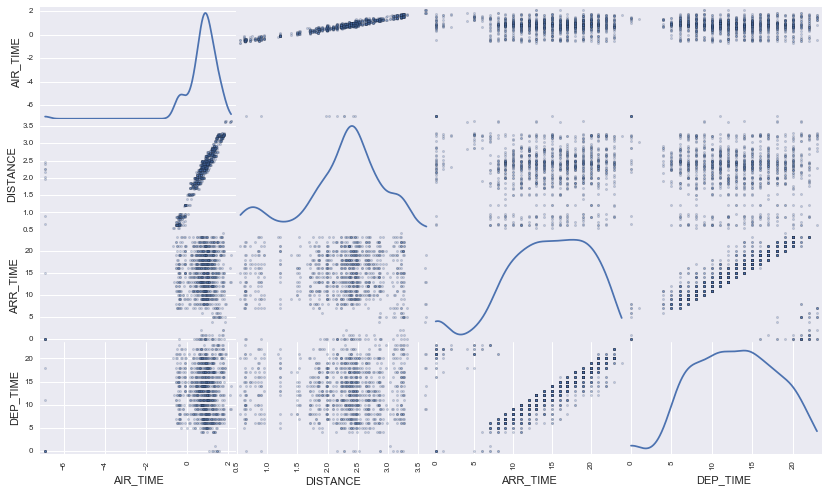

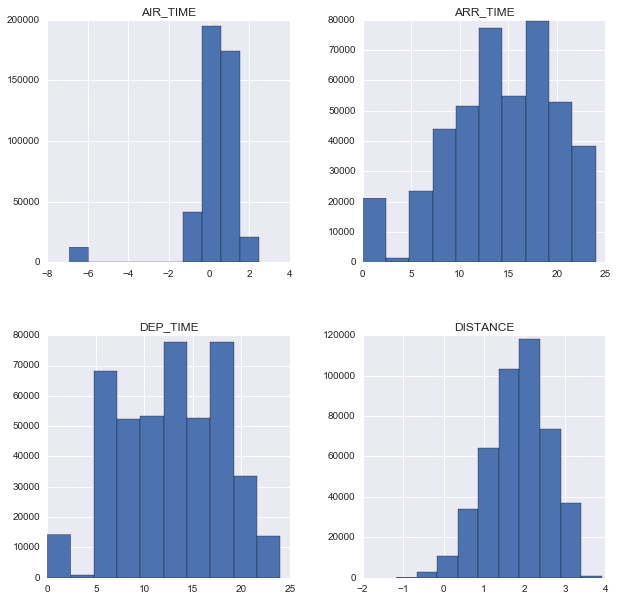

In [79]:
## From the descriptive statistics we see that the delays have a few max outliers where the flight was delayed for a 
## long period of time.
## Drop records where the delay is 10 standard deviations away from the mean. This removes some of the outliers.

features_set2 = data.copy(deep=True)

## We use the same features set that we used in our first attempt/regression
features_set2 = features_set2.loc[:,['DEP_TIME', 'ARR_DELAY', 'DEP_DELAY', 'ARR_TIME', 'AIR_TIME', 'DISTANCE']].fillna(value=0)

## In order to scale the features to roughly the same range we 
## change AIRTIME from minutes to hours and distance to hundreds of miles.
features_set2.loc[:,['AIR_TIME']] = features_set2.loc[:,['AIR_TIME']].div(60)
features_set2.loc[:,['DISTANCE']] = features_set2.loc[:,['DISTANCE']].div(100)

## We change the time from hhmm format to only hh format.
features_set2['ARR_TIME'] = features_set2.loc[:,'ARR_TIME'].div(100).fillna(0).map(lambda x: int(x))
features_set2['DEP_TIME'] = features_set2.loc[:,'DEP_TIME'].div(100).fillna(0).map(lambda x: int(x))

## Drop the rows where ARR_DELAY is more than 260.
features_set2 = features_set2.loc[features_set2.ARR_DELAY < 260].fillna(value=0)
features_set2.loc[:, ['AIR_TIME']] = features_set2.loc[:, ['AIR_TIME']] + 0.001

## Create a separate predicted series and drop the predicted from the feature set.
arr_delay = features_set2['ARR_DELAY'].fillna(value=0)
features_set2 = features_set2.drop(['ARR_DELAY'], axis = 1)

# Drop DEP_DELAY from the features set
features_set2 = features_set2.drop(['DEP_DELAY'], axis = 1)


# Break the predicted in categories 
cat_arr_delay = pd.cut(arr_delay, bins = [-79, 0, 60, 260], labels = ["early", "late", "very late"], right = False)

# Display the features and labels
display ("Descriptive Statistics of the features set")
display(features_set2.describe())
print "-"*100
display ("These are the first few lines of the features set")
display(features_set2.head())
print "-"*100
display ("Descriptive Statistics of the labels set")
display(cat_arr_delay.head())
print "-"*100

log_features_set2 = np.log(features_set2.drop(['ARR_TIME', 'DEP_TIME'], axis =1))
log_features_set2 = pd.concat([log_features_set2, features_set2.loc[:,['ARR_TIME', 'DEP_TIME']]],  axis =1)

display ("Descriptive Statistics of the natural log of the features set")
display(log_features_set2.describe())

_ = pd.scatter_matrix(log_features_set2[0:1000], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

log_features_set2.hist(figsize=(10,10), bins=10)



### Implementation: Shuffle and Split Data
Next we split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

We do the followin:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `labels` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [80]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(log_features_set2, cat_arr_delay, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."


# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = KNeighborsClassifier()
clf_C = GaussianNB()
clf_D = RandomForestClassifier(n_estimators=20)

train_predict(clf_A, X_train, y_train, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)
train_predict(clf_D, X_train, y_train, X_test, y_test)


Training and testing split was successful.
Training a DecisionTreeClassifier using a training set size of 355723. . .
Trained model in 2.3831 seconds
Made predictions in 0.2370 seconds.
F1 score for training set: 0.9078.
Made predictions in 0.0549 seconds.
F1 score for test set: 0.6693.
Training a KNeighborsClassifier using a training set size of 355723. . .
Trained model in 10.6100 seconds
Made predictions in 13.5411 seconds.
F1 score for training set: 0.7459.
Made predictions in 3.6163 seconds.
F1 score for test set: 0.6534.
Training a GaussianNB using a training set size of 355723. . .
Trained model in 0.6838 seconds
Made predictions in 0.1026 seconds.
F1 score for training set: 0.5651.
Made predictions in 0.0208 seconds.
F1 score for test set: 0.5642.
Training a RandomForestClassifier using a training set size of 355723. . .
Trained model in 26.6824 seconds
Made predictions in 4.4611 seconds.
F1 score for training set: 0.9042.
Made predictions in 0.9923 seconds.
F1 score for test s

### Section 4.3 - Classification Using Full  Feature Set
As expected, by increasing the precision in our labels the F-score for all the tests decreased. Except for the `GaussianNB` the other tests seem to still do well with a reasonably large scores for the training and test datasets. We also notice that `'AIR_TIME' and 'DISTANCE'` have become more normalised compared to the histograms in the previous section. Remember that we are still working with a reduced feature list: `'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'AIR_TIME', 'DISTANCE'`. In the next section we will use the entire feature list to see if that will improve the predictive powers of the model. We have to keep in mind the **curse of dimensonality** and there is a good chance that the model using all the feature list will likely do worse than a more simplified model. Lets find out.......

In [81]:
# Start from fresh.
features_set2_f = data.copy(deep=True)

# We only use data where the arrival delay is better than 260
features_set2_f = features_set2_f[features_set2_f.ARR_DELAY < 260].drop(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], axis = 1).fillna(value=0)
# Change categorical variables to numerical variables to run classification
features_set2_f = pd.get_dummies(features_set2_f)

## Create a separate predicted series and drop the predicted from the feature set.
arr_delay = features_set2_f['ARR_DELAY'].fillna(value=0)
features_set2_f = features_set2_f.drop(['ARR_DELAY'], axis = 1)

# Break the predicted in categories 
cat_arr_delay = pd.cut(arr_delay, bins = [-79, 0, 60, 260], labels = ["early", "late", "very late"], right = False)


### Implementation: Shuffle and Split Data
Next we split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

We do the followin:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `labels` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [82]:

# Drop DEP_DELAY from the features set
features_set2_f = features_set2_f.drop(['DEP_DELAY'], axis = 1)
features_set2_f = features_set2_f.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(features_set2_f, cat_arr_delay, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

display(X_train.head())
display(y_train.describe())


# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = KNeighborsClassifier()
clf_C = GaussianNB()
clf_D = RandomForestClassifier(n_estimators=20)

train_predict(clf_A, X_train, y_train, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)
train_predict(clf_D, X_train, y_train, X_test, y_test)

Training and testing split was successful.


,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,DEP_TIME,ARR_TIME,AIR_TIME,FLIGHTS,DISTANCE
32958,3,3,2392,30466,31650,1237.0,1646.0,167.0,1.0,1276.0
296796,21,5,404,32575,30325,927.0,1243.0,114.0,1.0,862.0
406106,29,0,2318,30325,30194,904.0,1152.0,85.0,1.0,641.0
334063,24,1,760,33570,31454,1044.0,1824.0,246.0,1.0,2149.0
302578,21,11,968,30194,30466,952.0,1124.0,133.0,1.0,879.0


,counts,freqs
categories,,
early,225574,0.652514
late,104418,0.302048
very late,15708,0.045438


Training a DecisionTreeClassifier using a training set size of 345700. . .
Trained model in 5.5138 seconds
Made predictions in 0.2259 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0533 seconds.
F1 score for test set: 0.7189.
Training a KNeighborsClassifier using a training set size of 345700. . .
Trained model in 2.1690 seconds
Made predictions in 9.1721 seconds.
F1 score for training set: 0.8474.
Made predictions in 2.4348 seconds.
F1 score for test set: 0.7745.
Training a GaussianNB using a training set size of 345700. . .
Trained model in 0.7676 seconds
Made predictions in 0.2033 seconds.
F1 score for training set: 0.5361.
Made predictions in 0.0530 seconds.
F1 score for test set: 0.5391.
Training a RandomForestClassifier using a training set size of 345700. . .
Trained model in 33.6367 seconds
Made predictions in 3.9625 seconds.
F1 score for training set: 0.9971.
Made predictions in 0.9443 seconds.
F1 score for test set: 0.7593.


### Section 4.3 - Final Classification results

So we see that some classifiers are better using the reduced feature set and some are better using the full feature set. The comparison is as below:


| Classifier             | Reduced Feature Set               | Full Feature Set                  |
| :---------------:      | :---------------------:           | :--------------------:            |           
| DecisionTreeClassifier |F1 score for training set: 0.9078  | F1 score for training set: 1.0000 |
|                        |F1 score for test set: 0.6693      | F1 score for test set: 0.7189     |
| KNeighborsClassifier   |F1 score for training set: 0.7459  | F1 score for training set: 0.8474 |
|                        |F1 score for test set: 0.6534      | F1 score for test set: 0.7745     |
| GaussianNB             |F1 score for training set: 0.5651  | F1 score for training set: 0.5361 |
|                        |F1 score for test set: 0.5642      | F1 score for test set: 0.5391     |
| RandomForestClassifier |F1 score for training set: 0.9042. | F1 score for training set: 0.9966 |
|                        |F1 score for test set: 0.6706.     | F1 score for test set: 0.7593     |


## Section 5 - Selecting Model and Optimizing Performance


Referring to sections 3.6 and 4.3, we see that regression produces better results compared to classification almost every time. Further the predicted variable `ARR_DELAY` is continous and hence breaking it into categories results in loss of precision. We decide to go with a regression model. Next we need to choose between a reduced feature set model (without `DEP_DELAY`) and a full feature set model. Even though the former produces better regression score we choose the latter model. This is because the regression score is still very good (0.95 for `RandomForestRegressor`) and the full feature set gives us predictive power over a wider range of feature set. This allows us to attempt a prediction even if we have limited input data. Thus we choose a `RandomForestRegressor` over a full feature set as the model that we should try to optimize.

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *RandomForestRegressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on. But first we must ask if we really need all the features in the full feature set. Maybe only some of the features are really being used and explain most of the predictive power of the model. A good way to find this out is by running the PCA.

### Implementation: Fitting a Model



We bring everything together and train a model using the **`RandomForestRegressor`**. To ensure that we are producing an optimized model, we train the model using the grid search technique to optimize the `'max_depth' and 'n_estimators'` parameter for the random forest. The `'n_estimators'` paramter can be thought of as how many decision trees to create to forum a quorom. `RandomForestRegressor` uses the majority vote of this quorom to make a selection. The `'max_depth'` parameter can be thought of as how many questions that each decision tree algorithm is allowed to ask about the data before making a prediction. 

We implement the following:
- Create the model (which in our case is `RandomForestRegressor`) in the function.
- Create a dictionary for `'max_depth'` with the values from 1 to 10 and `'n_estimators'` with the values from 10 to 20, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [83]:
# TODO: Import 'make_scorer', '`RandomForestRegressor`', and 'GridSearchCV'
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = RandomForestRegressor(random_state=60, n_estimators=20)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth': range(1,21), 'n_estimators': range(10,21)}
    params = {'max_depth': range(10,21)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [84]:
features_set1_f = data.copy(deep=True)

# We only use data where the arrival delay is better than 260
features_set1_f = features_set1_f[features_set1_f.ARR_DELAY < 260].drop(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], axis = 1).fillna(value=0)

features_set1_f = features_set1_f.drop(['DEP_DELAY'], axis = 1)
features_set1_f = features_set1_f.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ], axis = 1)

# Change categorical variables to numerical variables to run classification
features_set1_f = pd.get_dummies(features_set1)

## Create a separate predicted series and drop the predicted from the feature set.
arr_delay = features_set1_f['ARR_DELAY'].fillna(value=0)
features_set1_f = features_set1_f.drop(['ARR_DELAY'], axis = 1)


print "Beginning optimization......."

X_train, X_test, y_train, y_test = train_test_split(features_set1_f, arr_delay, test_size=0.2, random_state=42)

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])


# define a regressor, fit it and score it.
regressor2 = RandomForestRegressor(random_state=60, n_estimators=20, max_depth = reg.get_params()['max_depth'])
X_train, X_test, y_train, y_test = train_test_split(features_set1, arr_delay, test_size=0.2, random_state=42)
regressor2.fit(X_train, y_train)
display ("Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY NOT part of the FULL feature set")
print regressor2.score(X_test, y_test)


Beginning optimization.......
Parameter 'max_depth' is 20 for the optimal model.


'Regression Score for regression prediction using a RandomForestRegressor with DEP_DELAY NOT part of the FULL feature set'

0.999987715468
